In [65]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU, Dropout
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
import tensorflow.keras

In [67]:
from tensorflow.keras.datasets import mnist   ## image recognisation:

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [68]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

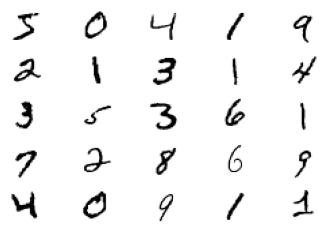

In [69]:
from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [70]:
ytrain[0] #the first image in xtrain is a FIVE!!

5

In [71]:
xtrain[0][0][0] #greyscale color values - each number represents the greyness of the pixels 0 (white) and 255 (black)

0

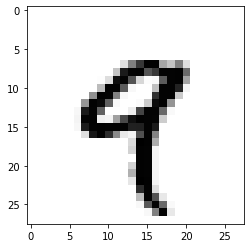

In [72]:
plt.imshow(xtrain[4], cmap=plt.cm.Greys)

In [73]:
xtrain[0].shape #each value in the 28 by 28 grid is a pixel in the picture, and the value in that pixel is the greyscal

(28, 28)

In [74]:
ytrain[0]

5

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_moons
import numpy as np

X, y = make_moons(50, noise=0.1)

# 1 Create the Network

In [76]:
m = Sequential() #Sequential creates the model wrapper

In [77]:
X[0].shape

(2,)

In [78]:
#add layers one by one using m.add()
# Dense layers are the layers you've seen on Monday - fully connected.. units = no. of neurons
# the first Dense layer that you add is the first Hidden layer NOT THE INPUT LAYER!! 
# THE FIRST HIDDEN LAYER IN KERAS NEEDS TO BE TOLD ABOUT THE SHAPE OF EACH DATA POINT!! no other layers
# the bias neuron comes by default
# keras accepts high-dimensional data
m.add(Dense(units=2, activation='sigmoid', input_shape=(2,)))

In [79]:
m.add(Dense(units=1, activation='sigmoid'))

In [80]:
m.summary() #see the structure of the NN

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


# 2: Compile the Network

In [81]:
#optimizer = what kind of gradient descent algorithm were going to use - rmsprop vs adam
#loss = binary prediction = binary_crossentropy, multiclass = categorical crossentropy,
#metrics = define our version of a succesful network.. for us accuracy (this is a callback function)
m.compile(optimizer='rmsprop',
          loss='binary_crossentropy',
          metrics=['accuracy'])

# 3: m.fit!!

In [82]:
# train the model and pass stats back into the variable h
# X, y = obvious
# epochs = iterations of feed forward and backprop
# batch_size = big batch_sizes train faster!! (because they compute gradient updates less frequently) 
# validation_split = cross validation - set aside some training data each epoch and m.predict on it
h  = m.fit(X, y, epochs=100, batch_size=5, validation_split=0.2)

Train on 40 samples, validate on 10 samples
Epoch 1/100
40/40 [==============================] - 0s 6ms/sample - loss: 0.7274 - acc: 0.5250 - val_loss: 0.8151 - val_acc: 0.4000
Epoch 2/100
40/40 [==============================] - 0s 934us/sample - loss: 0.7244 - acc: 0.5250 - val_loss: 0.8111 - val_acc: 0.4000
Epoch 3/100
40/40 [==============================] - 0s 872us/sample - loss: 0.7222 - acc: 0.5250 - val_loss: 0.8072 - val_acc: 0.4000
Epoch 4/100
40/40 [==============================] - 0s 613us/sample - loss: 0.7200 - acc: 0.5250 - val_loss: 0.8032 - val_acc: 0.4000
Epoch 5/100
40/40 [==============================] - 0s 627us/sample - loss: 0.7182 - acc: 0.5250 - val_loss: 0.7996 - val_acc: 0.4000
Epoch 6/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.7160 - acc: 0.5250 - val_loss: 0.7958 - val_acc: 0.4000
Epoch 7/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.7143 - acc: 0.5250 - val_loss: 0.7922 - val_acc: 0.4000
Epoch 8/100
40/40

Epoch 61/100
40/40 [==============================] - 0s 958us/sample - loss: 0.6494 - acc: 0.5250 - val_loss: 0.6664 - val_acc: 0.4000
Epoch 62/100
40/40 [==============================] - 0s 1ms/sample - loss: 0.6486 - acc: 0.5250 - val_loss: 0.6649 - val_acc: 0.4000
Epoch 63/100
40/40 [==============================] - 0s 638us/sample - loss: 0.6477 - acc: 0.5250 - val_loss: 0.6635 - val_acc: 0.4000
Epoch 64/100
40/40 [==============================] - 0s 691us/sample - loss: 0.6470 - acc: 0.5250 - val_loss: 0.6621 - val_acc: 0.4000
Epoch 65/100
40/40 [==============================] - 0s 806us/sample - loss: 0.6462 - acc: 0.5250 - val_loss: 0.6606 - val_acc: 0.4000
Epoch 66/100
40/40 [==============================] - 0s 603us/sample - loss: 0.6454 - acc: 0.5250 - val_loss: 0.6591 - val_acc: 0.4000
Epoch 67/100
40/40 [==============================] - 0s 641us/sample - loss: 0.6445 - acc: 0.5250 - val_loss: 0.6577 - val_acc: 0.4000
Epoch 68/100
40/40 [==============================

# 4: Evaluate our results and try and improve

In [83]:
# look at your training accuracy and loss
print(len(h.history['loss']))
print(len(h.history['val_loss']))

100
100


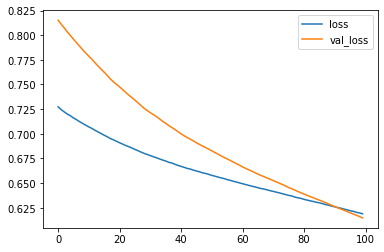

In [84]:
#visualise the networks training - LOSS
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

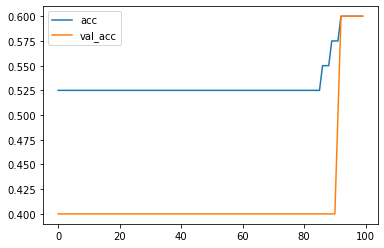

In [85]:
#visualise the networks training - ACCURACY
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [86]:
score = m.evaluate(X, y, batch_size=50)
print(score)

# prediction on new data points
print(m.predict(X[:10]))

50/50 [==============================] - 0s 39us/sample - loss: 0.6176 - acc: 0.6000
[0.6175671815872192, 0.6]
[[0.4569317 ]
 [0.38941327]
 [0.33935696]
 [0.4753838 ]
 [0.34235632]
 [0.34358746]
 [0.3493235 ]
 [0.47298867]
 [0.47967938]
 [0.334241  ]]


In [87]:
m.predict(X[:1])

array([[0.4569317]], dtype=float32)

In [88]:
x = X[0].reshape(1,-1)
x.shape, X[0].shape

((1, 2), (2,))

In [89]:
m.predict(x)

array([[0.4569317]], dtype=float32)

In [90]:
h  = m.fit(X, y, epochs=200, batch_size=10, validation_split=0.2)

Train on 40 samples, validate on 10 samples
Epoch 1/200
40/40 [==============================] - 0s 426us/sample - loss: 0.6183 - acc: 0.6000 - val_loss: 0.6141 - val_acc: 0.6000
Epoch 2/200
40/40 [==============================] - 0s 386us/sample - loss: 0.6178 - acc: 0.6000 - val_loss: 0.6135 - val_acc: 0.6000
Epoch 3/200
40/40 [==============================] - 0s 764us/sample - loss: 0.6174 - acc: 0.6000 - val_loss: 0.6128 - val_acc: 0.6000
Epoch 4/200
40/40 [==============================] - 0s 980us/sample - loss: 0.6169 - acc: 0.6000 - val_loss: 0.6120 - val_acc: 0.7000
Epoch 5/200
40/40 [==============================] - 0s 458us/sample - loss: 0.6166 - acc: 0.6000 - val_loss: 0.6113 - val_acc: 0.7000
Epoch 6/200
40/40 [==============================] - 0s 338us/sample - loss: 0.6162 - acc: 0.6250 - val_loss: 0.6105 - val_acc: 0.7000
Epoch 7/200
40/40 [==============================] - 0s 315us/sample - loss: 0.6155 - acc: 0.6250 - val_loss: 0.6097 - val_acc: 0.7000
Epoch 8/200

Epoch 61/200
40/40 [==============================] - 0s 485us/sample - loss: 0.5869 - acc: 0.7500 - val_loss: 0.5646 - val_acc: 0.9000
Epoch 62/200
40/40 [==============================] - 0s 435us/sample - loss: 0.5865 - acc: 0.7500 - val_loss: 0.5638 - val_acc: 0.9000
Epoch 63/200
40/40 [==============================] - 0s 592us/sample - loss: 0.5858 - acc: 0.7500 - val_loss: 0.5630 - val_acc: 1.0000
Epoch 64/200
40/40 [==============================] - 0s 492us/sample - loss: 0.5854 - acc: 0.7500 - val_loss: 0.5623 - val_acc: 1.0000
Epoch 65/200
40/40 [==============================] - 0s 593us/sample - loss: 0.5849 - acc: 0.7500 - val_loss: 0.5615 - val_acc: 1.0000
Epoch 66/200
40/40 [==============================] - 0s 530us/sample - loss: 0.5844 - acc: 0.7500 - val_loss: 0.5608 - val_acc: 1.0000
Epoch 67/200
40/40 [==============================] - 0s 393us/sample - loss: 0.5838 - acc: 0.7750 - val_loss: 0.5601 - val_acc: 1.0000
Epoch 68/200
40/40 [============================

Epoch 181/200
40/40 [==============================] - 0s 355us/sample - loss: 0.5294 - acc: 0.7750 - val_loss: 0.4778 - val_acc: 1.0000
Epoch 182/200
40/40 [==============================] - 0s 419us/sample - loss: 0.5291 - acc: 0.7750 - val_loss: 0.4772 - val_acc: 1.0000
Epoch 183/200
40/40 [==============================] - 0s 405us/sample - loss: 0.5287 - acc: 0.7750 - val_loss: 0.4766 - val_acc: 1.0000
Epoch 184/200
40/40 [==============================] - 0s 402us/sample - loss: 0.5282 - acc: 0.7750 - val_loss: 0.4759 - val_acc: 1.0000
Epoch 185/200
40/40 [==============================] - 0s 375us/sample - loss: 0.5280 - acc: 0.7750 - val_loss: 0.4753 - val_acc: 1.0000
Epoch 186/200
40/40 [==============================] - 0s 424us/sample - loss: 0.5274 - acc: 0.7750 - val_loss: 0.4747 - val_acc: 1.0000
Epoch 187/200
40/40 [==============================] - 0s 492us/sample - loss: 0.5269 - acc: 0.7750 - val_loss: 0.4740 - val_acc: 1.0000
Epoch 188/200
40/40 [====================

In [91]:
print(len(h.history['loss']))
print(len(h.history['val_loss']))

200
200


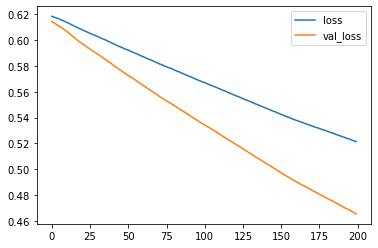

In [92]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

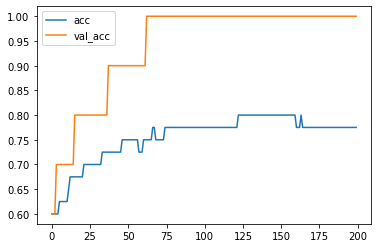

In [93]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
m = Sequential()
m.add(Flatten(input_shape=(28, 28)))
m.add(Dense(units=25, activation='relu'))# Hyperparameters: units = # neurons, activation, weight_initialization
m.add(Dropout(0.5))
m.add(Dense(units=10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
m.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy']
)

In [6]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Create the early stopping callback
stopping = EarlyStopping(min_delta=0.02, patience=2)
# min_delta = the maximum change in val_loss that is considered not being a change
# patience = the number of epochs that the val_loss has to be constant

In [8]:
# Fit our model
history = m.fit(x_train, to_categorical(y_train), epochs=100, validation_split=0.2,
               callbacks=[stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 3s 60us/sample - loss: 3.1880 - acc: 0.1618 - val_loss: 1.9240 - val_acc: 0.2777
Epoch 2/100
48000/48000 [==============================] - 3s 55us/sample - loss: 2.0313 - acc: 0.2442 - val_loss: 1.5941 - val_acc: 0.4197
Epoch 3/100
48000/48000 [==============================] - 3s 55us/sample - loss: 1.9006 - acc: 0.2943 - val_loss: 1.5250 - val_acc: 0.4403
Epoch 4/100
48000/48000 [==============================] - 3s 56us/sample - loss: 1.8311 - acc: 0.3211 - val_loss: 1.3867 - val_acc: 0.4882
Epoch 5/100
48000/48000 [==============================] - 3s 55us/sample - loss: 1.7187 - acc: 0.3548 - val_loss: 1.2584 - val_acc: 0.5400
Epoch 6/100
48000/48000 [==============================] - 3s 57us/sample - loss: 1.6702 - acc: 0.3664 - val_loss: 1.1924 - val_acc: 0.5701
Epoch 7/100
48000/48000 [==============================] - 3s 59us/sample - loss: 1.6365 - acc: 0.3788 - val_l

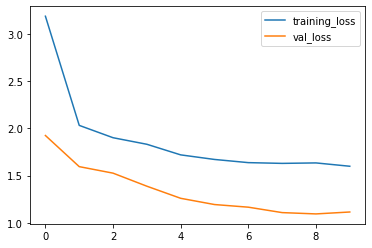

In [9]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

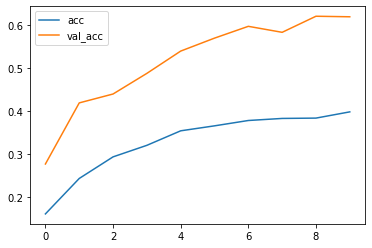

In [10]:
#visualise the networks training - ACCURACY
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [11]:
score = m.evaluate(x=x_train, y=to_categorical(y_train), batch_size=500)
print(score)

# prediction on new data points
print(m.predict(x_test[:10]))

60000/60000 [==============================] - 0s 4us/sample - loss: 1.0989 - acc: 0.6205
[1.0989180023471514, 0.62053335]
[[0.00000000e+00 2.02222240e-33 1.37156367e-05 7.68481723e-09
  1.50404511e-09 1.41893415e-20 0.00000000e+00 9.48807240e-01
  0.00000000e+00 5.11790141e-02]
 [8.14298391e-02 5.44694662e-02 1.47617325e-01 1.55778274e-01
  6.82523847e-02 1.30448028e-01 8.65795091e-02 3.93667594e-02
  1.49000555e-01 8.70578811e-02]
 [0.00000000e+00 9.99556839e-01 5.64461197e-06 1.37427558e-09
  6.86538997e-17 1.89810828e-06 1.26080665e-11 2.36134310e-05
  4.11973044e-04 6.92951616e-08]
 [8.07987750e-01 0.00000000e+00 9.60959271e-02 8.89067166e-03
  1.79224764e-03 1.61759984e-02 2.12439764e-02 4.26940694e-02
  1.41344208e-04 4.97803418e-03]
 [2.05496312e-04 7.29972031e-04 2.56335712e-04 1.34438131e-04
  4.62460488e-01 6.22087508e-04 1.72433502e-03 1.11155868e-01
  9.29855523e-05 4.22617882e-01]
 [0.00000000e+00 9.99994278e-01 7.66736630e-09 6.16302528e-14
  5.83261813e-26 2.30858088e-0

# One important thing!! Clear the sessions between creating models, or restart your kernel

In [16]:
from tensorflow.keras import backend as K

K.clear_session()

# Pretrained CNN

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pprint import pprint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions

In [55]:
m = VGG16(weights='imagenet')

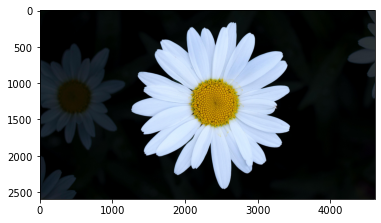

In [56]:
path = '/Users/shakilafarjana/Downloads/daisy.jpg'
image = plt.imread(path)
plt.imshow(image)

In [57]:
image.shape  #pixel for hight, width and colour chanels(red,blue and green)

(2592, 4608, 3)

In [58]:
image = cv2.resize(image,(224,224),interpolation=cv2.INTER_CUBIC)

In [59]:
image.shape #1 image ,224,224 pixel and 3 color

(224, 224, 3)

In [60]:
image

array([[[ 3,  9,  5],
        [ 3,  9,  5],
        [ 2,  8,  4],
        ...,
        [33, 41, 44],
        [35, 43, 46],
        [40, 45, 49]],

       [[ 4,  9,  5],
        [ 2,  7,  3],
        [ 2,  7,  3],
        ...,
        [37, 42, 46],
        [34, 41, 49],
        [36, 44, 47]],

       [[ 2,  7,  3],
        [ 2,  7,  3],
        [ 2,  7,  3],
        ...,
        [41, 46, 50],
        [33, 40, 48],
        [36, 44, 47]],

       ...,

       [[29, 34, 38],
        [29, 36, 44],
        [29, 36, 46],
        ...,
        [ 8,  6,  7],
        [ 6,  4,  7],
        [ 7,  2,  6]],

       [[30, 35, 39],
        [27, 34, 42],
        [21, 29, 32],
        ...,
        [10,  8,  9],
        [ 8,  6,  9],
        [ 8,  3,  7]],

       [[31, 35, 39],
        [24, 25, 28],
        [19, 22, 19],
        ...,
        [ 9,  9,  9],
        [ 7,  5,  8],
        [ 8,  6,  9]]], dtype=uint8)

In [61]:
image = np.expand_dims(image, axis=0)
image.shape

(1, 224, 224, 3)

In [62]:
results = m.predict(image)
results

array([[1.31836151e-08, 5.62511923e-06, 1.06865832e-08, 2.45210199e-08,
        1.31887901e-07, 1.23079786e-07, 1.11340299e-07, 4.42774071e-05,
        1.18241151e-05, 3.04026685e-07, 2.71307272e-06, 2.28257722e-05,
        3.70128919e-06, 5.99811619e-06, 1.15126051e-04, 1.81588348e-05,
        1.13433262e-05, 1.77565424e-04, 1.25494233e-04, 1.28879428e-05,
        8.80131938e-06, 5.56319937e-05, 2.21460632e-05, 1.49258003e-05,
        1.81876912e-05, 5.98065185e-07, 2.91228901e-07, 3.58436722e-07,
        5.20356366e-07, 1.40354587e-07, 3.10339601e-07, 7.92198819e-07,
        1.62209588e-07, 5.32702025e-08, 7.79038260e-07, 7.10415335e-08,
        1.72077182e-06, 1.00280786e-07, 1.66933376e-07, 2.55832845e-07,
        1.28080740e-06, 9.24810166e-08, 1.34241020e-06, 4.15936228e-07,
        1.67806803e-07, 8.13926846e-08, 2.23414054e-06, 1.62783891e-07,
        1.34125457e-08, 2.75755212e-07, 2.65370090e-07, 5.34345510e-08,
        1.15139272e-07, 5.10565258e-07, 1.42346536e-07, 5.058475

In [63]:
pprint(decode_predictions(results, 20)) #successfully predict the name of this flower(daisy)

[[('n11939491', 'daisy', 0.9811427),
  ('n04522168', 'vase', 0.0031998877),
  ('n02219486', 'ant', 0.0016219544),
  ('n01819313', 'sulphur-crested_cockatoo', 0.0016111551),
  ('n01795545', 'black_grouse', 0.0013437995),
  ('n07930864', 'cup', 0.0011088048),
  ('n02206856', 'bee', 0.0009872497),
  ('n01833805', 'hummingbird', 0.0006861538),
  ('n02190166', 'fly', 0.00062180933),
  ('n03930313', 'picket_fence', 0.00058322074),
  ('n02948072', 'candle', 0.0004386002),
  ('n02276258', 'admiral', 0.00032772534),
  ('n03476684', 'hair_slide', 0.00026586265),
  ('n02009912', 'American_egret', 0.00025289657),
  ('n04033901', 'quill', 0.00024491482),
  ('n02281787', 'lycaenid', 0.00022862821),
  ('n02280649', 'cabbage_butterfly', 0.0002112639),
  ('n02281406', 'sulphur_butterfly', 0.0001797898),
  ('n01580077', 'jay', 0.00017756542),
  ('n04456115', 'torch', 0.00015570376)]]
